In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

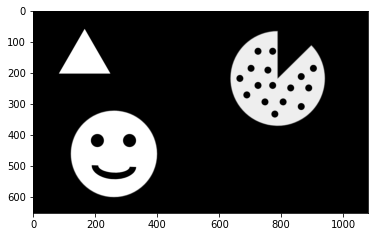

In [14]:
img = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\internal_external.png',0)
plt.imshow(img, cmap='gray')

In [15]:
img_copy = img.copy()

In [16]:
contours,hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
len(contours)

22

In [18]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

## External

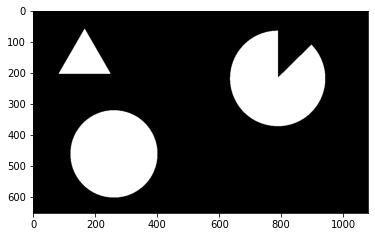

In [25]:
external_contours = np.zeros(shape=img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours, cmap='gray')

## Internal

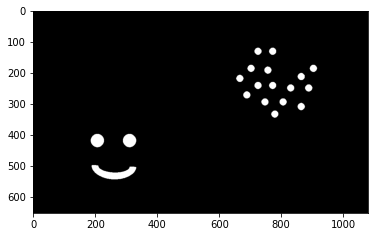

In [27]:
internal_contours = np.zeros(shape=img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)
plt.imshow(internal_contours, cmap='gray')

## Count Ballon

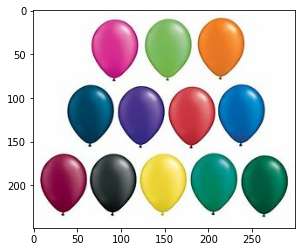

In [29]:
ballon = cv2.cvtColor(cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\colorfull_ballon.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(ballon)

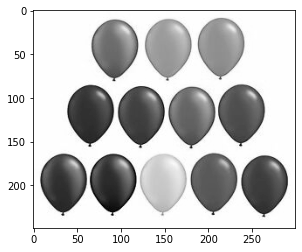

In [31]:
gray_ballon = cv2.cvtColor(ballon, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_ballon, cmap='gray')

### Using threshold and blur

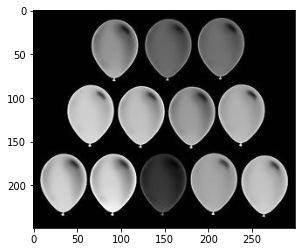

In [34]:
g = cv2.bitwise_not(gray_ballon)
plt.imshow(g, cmap='gray')

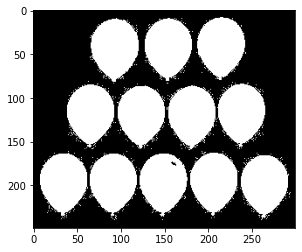

In [40]:
ret, thres = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
plt.imshow(thres, 'gray')

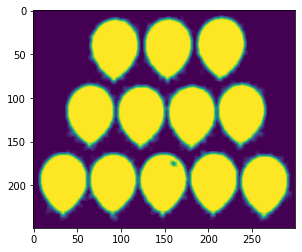

In [73]:
blurred = cv2.blur(thres, ksize=(5,5))
plt.imshow(blurred)

In [74]:
contours, hierarchy = cv2.findContours(blurred, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

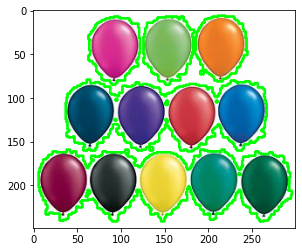

In [75]:
ballon = cv2.cvtColor(cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\colorfull_ballon.jpg'), cv2.COLOR_BGR2RGB)
cv2.drawContours(ballon, contours, -1, (0,255,0), 2)
plt.imshow(ballon)

In [76]:
count = 0
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        count += 1

count

5

### Using Canny

In [77]:
mean = np.median(gray_ballon)

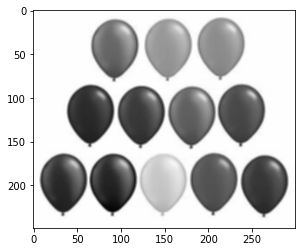

In [123]:
blurred = cv2.blur(gray_ballon, ksize=(3,3))
plt.imshow(blurred, cmap='gray')

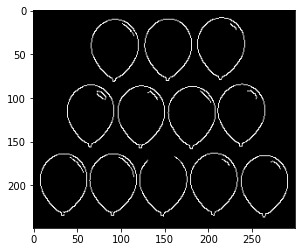

In [132]:
g = cv2.Canny(blurred, max(0, 0.7*mean), min(255, 1.3*(mean)))
plt.imshow(g, cmap='gray')

In [133]:
contours, hierarchy = cv2.findContours(g, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

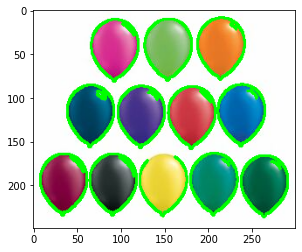

In [134]:
ballon = cv2.cvtColor(cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\colorfull_ballon.jpg'), cv2.COLOR_BGR2RGB)
cv2.drawContours(ballon, contours, -1, (0,255,0), 2)
plt.imshow(ballon)

In [135]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 5,  1,  3, -1],
        [-1, -1,  4,  2],
        [-1, -1, -1,  3],
        [ 8,  2,  6, -1],
        [-1, -1,  7,  5],
        [-1, -1, -1,  6],
        [ 9,  5, -1, -1],
        [12,  8, 10, -1],
        [-1, -1, 11,  9],
        [-1, -1, -1, 10],
        [15,  9, 13, -1],
        [-1, -1, 14, 12],
        [-1, -1, -1, 13],
        [18, 12, 16, -1],
        [-1, -1, 17, 15],
        [-1, -1, -1, 16],
        [22, 15, 19, -1],
        [-1, -1, 20, 18],
        [21, -1, -1, 19],
        [-1, 20, -1, 19],
        [25, 18, 23, -1],
        [-1, -1, 24, 22],
        [-1, -1, -1, 23],
        [27, 22, 26, -1],
        [-1, -1, -1, 25],
        [30, 25, 28, -1],
        [-1, -1, 29, 27],
        [-1, -1, -1, 28],
        [-1, 27, 31, -1],
        [-1, -1, 32, 30],
        [-1, -1, -1, 31]]], dtype=int32)

In [136]:
count = 0
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        count += 1

count

13